In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hp-sentiment/user_data.csv


In [4]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [5]:
df = pd.read_csv('/kaggle/input/hp-sentiment/user_data.csv')

In [6]:
df.head()

,User ID,Age,Gender,Location,Brand,Model,Post,Sentiment,Category,Keywords,Features/ Problems
0,1,35,Male,Los Angeles,USA,HP,OfficeJet Pro 6968,Having issues with the OfficeJet Pro 6968 scan...,Complaint,Problem,Scanner Issues
1,2,42,Female,Sydney,Australia,HP,DeskJet 3755,The DeskJet 3755 is a compact and efficient pr...,Appreciation,Appreciation,Compact Design
2,3,28,Male,Toronto,Canada,HP,LaserJet Pro MFP,The LaserJet Pro MFP offers excellent print qu...,Appreciation,Appreciation,Print Quality
3,4,33,Female,Berlin,Germany,HP,ENVY Photo 6255,The ENVY Photo 6255 wireless setup is confusing.,Complaint,Problem,Wireless Setup
4,5,39,Male,Paris,France,HP,DeskJet 3639,The DeskJet 3639 is an affordable and reliable...,Appreciation,Appreciation,Affordability


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User ID             100 non-null    int64 
 1   Age                 100 non-null    int64 
 2   Gender              100 non-null    object
 3   Location            100 non-null    object
 4   Brand               100 non-null    object
 5   Model               100 non-null    object
 6   Post                100 non-null    object
 7   Sentiment           100 non-null    object
 8   Category            100 non-null    object
 9   Keywords            100 non-null    object
 10  Features/ Problems  100 non-null    object
dtypes: int64(2), object(9)
memory usage: 8.7+ KB


In [8]:
df.isnull().sum()

User ID               0
Age                   0
Gender                0
Location              0
Brand                 0
Model                 0
Post                  0
Sentiment             0
Category              0
Keywords              0
Features/ Problems    0
dtype: int64

In [9]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Location', 'Brand', 'Model', 'Post',
       'Sentiment', 'Category', 'Keywords', 'Features/ Problems'],
      dtype='object')

In [12]:
text_df = df.drop(['User ID', 'Age', 'Gender', 'Location', 'Brand', 'Model', 'Post','Keywords','Category', 'Features/ Problems'], axis=1)
text_df.head()

,Sentiment
0,Having issues with the OfficeJet Pro 6968 scan...
1,The DeskJet 3755 is a compact and efficient pr...
2,The LaserJet Pro MFP offers excellent print qu...
3,The ENVY Photo 6255 wireless setup is confusing.
4,The DeskJet 3639 is an affordable and reliable...


In [13]:
print(text_df['Sentiment'].iloc[0],"\n")
print(text_df['Sentiment'].iloc[1],"\n")
print(text_df['Sentiment'].iloc[2],"\n")
print(text_df['Sentiment'].iloc[3],"\n")
print(text_df['Sentiment'].iloc[4],"\n")

Having issues with the OfficeJet Pro 6968 scanner. 

The DeskJet 3755 is a compact and efficient printer. 

The LaserJet Pro MFP offers excellent print quality. 

The ENVY Photo 6255 wireless setup is confusing. 

The DeskJet 3639 is an affordable and reliable printer. 



In [14]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


In [17]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [20]:
text_df.Sentiment = text_df['Sentiment'].apply(data_processing)

In [22]:
text_df = text_df.drop_duplicates('Sentiment')

In [23]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [25]:
text_df['Sentiment'] = text_df['Sentiment'].apply(lambda x: stemming(x))

/tmp/ipykernel_32/2026791000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['Sentiment'] = text_df['Sentiment'].apply(lambda x: stemming(x))


In [26]:
text_df.head()

,Sentiment
0,issues officejet pro 6968 scanner
1,deskjet 3755 compact efficient printer
2,laserjet pro mfp offers excellent print quality
3,envy photo 6255 wireless setup confusing
4,deskjet 3639 affordable reliable printer


In [27]:
print(text_df['Sentiment'].iloc[0],"\n")
print(text_df['Sentiment'].iloc[1],"\n")
print(text_df['Sentiment'].iloc[2],"\n")
print(text_df['Sentiment'].iloc[3],"\n")
print(text_df['Sentiment'].iloc[4],"\n")

issues officejet pro 6968 scanner 

deskjet 3755 compact efficient printer 

laserjet pro mfp offers excellent print quality 

envy photo 6255 wireless setup confusing 

deskjet 3639 affordable reliable printer 



In [29]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 45
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  46 non-null     object
dtypes: object(1)
memory usage: 736.0+ bytes


In [30]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [32]:
text_df['polarity'] = text_df['Sentiment'].apply(polarity)
text_df.head(10)

,Sentiment,polarity
0,issues officejet pro 6968 scanner,0.00
1,deskjet 3755 compact efficient printer,0.00
2,laserjet pro mfp offers excellent print quality,0.55
3,envy photo 6255 wireless setup confusing,-0.30
4,deskjet 3639 affordable reliable printer,0.00
5,trouble officejet 5255 paper jam,-0.20
6,laserjet pro delivers fast highquality printing,0.20
7,need recommendations envy photo 7855 ink cartr...,0.00
8,deskjet 3630 userfriendly produces good prints,0.70
9,officejet pro 6968 reliable featurerich printer,0.00


In [45]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"
    

In [46]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [47]:
text_df.head()

,Sentiment,polarity,sentiment,category
0,issues officejet pro 6968 scanner,0.00,Neutral,Neutral
1,deskjet 3755 compact efficient printer,0.00,Neutral,Neutral
2,laserjet pro mfp offers excellent print quality,0.55,Positive,Positive
3,envy photo 6255 wireless setup confusing,-0.30,Negative,Negative
4,deskjet 3639 affordable reliable printer,0.00,Neutral,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

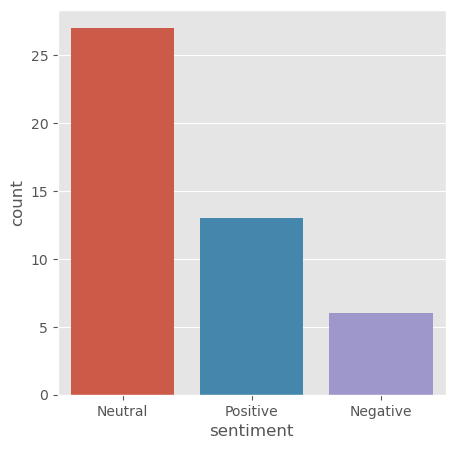

In [37]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

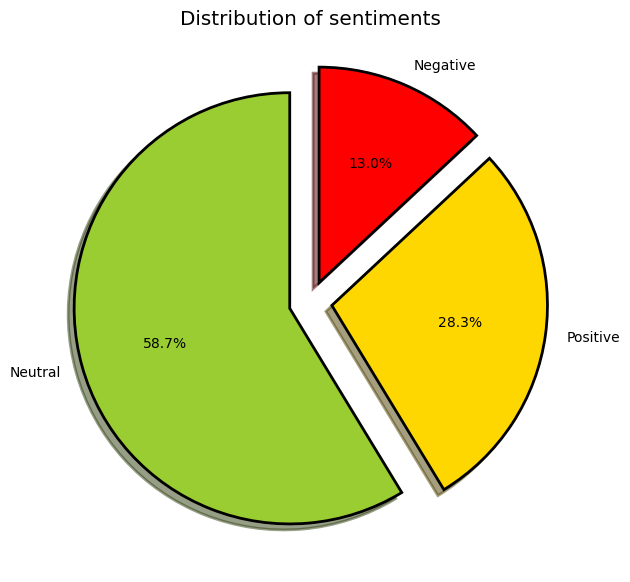

In [38]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [40]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Sentiment,polarity,sentiment
15,laserjet pro provides excellent print speed qu...,1.00,Positive
11,laserjet pro mfp allinone printer great features,0.80,Positive
8,deskjet 3630 userfriendly produces good prints,0.70,Positive
40,officejet 3830 allinone printer good performance,0.70,Positive
2,laserjet pro mfp offers excellent print quality,0.55,Positive


In [50]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['Sentiment'])

In [53]:
X = text_df['Sentiment']
Y = text_df['sentiment']
X = vect.transform(X)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [55]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (36, 237)
Size of y_train: (36,)
Size of x_test: (10, 237)
Size of y_test: (10,)


In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 70.00%


In [58]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[0 1 0]
 [0 7 0]
 [0 2 0]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.70      1.00      0.82         7
    Positive       0.00      0.00      0.00         2

    accuracy                           0.70        10
   macro avg       0.23      0.33      0.27        10
weighted avg       0.49      0.70      0.58        10



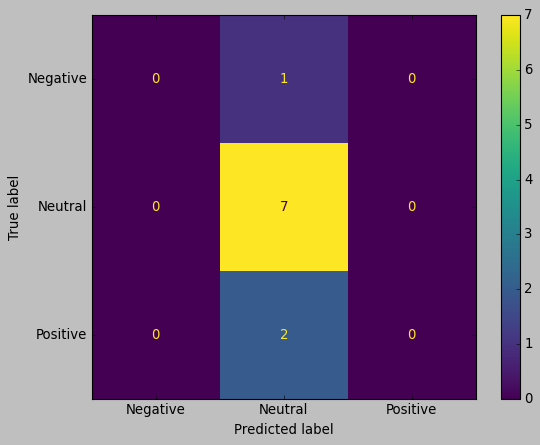

In [59]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [62]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [64]:
y_pred = grid.predict(x_test)

In [65]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 70.00%


In [66]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[0 1 0]
 [0 7 0]
 [0 2 0]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.70      1.00      0.82         7
    Positive       0.00      0.00      0.00         2

    accuracy                           0.70        10
   macro avg       0.23      0.33      0.27        10
weighted avg       0.49      0.70      0.58        10

